# Financial Fraud Dataset Overview
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from random import sample

In [2]:
#Read in raw finanical fraud dataset CSV
df = pd.read_csv("/Users/sa14/Desktop/fin eda final/data/BankFraud_Data.csv")

In [3]:
#Get first 10 rows of the dataset
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
#Get the count of rows and columns for the dataset
df.shape

(6362620, 11)

**This dataset has 6,362,620 rows and 11 rows.**

In [6]:
#Get overall count of null/NaN values in the dataset
nan_count = df.isnull().sum()
print("Null Values by Column \n", nan_count)

Null Values by Column 
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


**This dataset does not contain any null values throughout all 6,362,620 rows and 11 rows**

In [7]:
#Describe the summary statistics of each numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#Determine the descriptive statistics of the dataset such as the mean, median, percentiles, etc.
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


___
## Univariate Analysis
___


> ### Pre-Existing Information about the "IsFraud" Column

Was this simulated transaction actually fraudulent? 

In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 

It is an integer column where:

* 0 = Indicates that the transaction is not fraud
* 1 = Indicates that the transaction is fraud
>

In [10]:
#Get count of unique transactions labeled isFraud
isfraud_count = df["isFraud"].value_counts()

#Convert isfraud_count to a dataframe
isfraud_count.to_frame()

,count
isFraud,
0,6354407
1,8213


In [11]:
#Display the proporion of transactions flagged as Not Fraud or Fraud
isfraud_prop = df["isFraud"].value_counts(normalize=True)

#Convert the flagged_prop series into a dataframe
isfraud_prop.to_frame()

,proportion
isFraud,
0,0.998709
1,0.001291


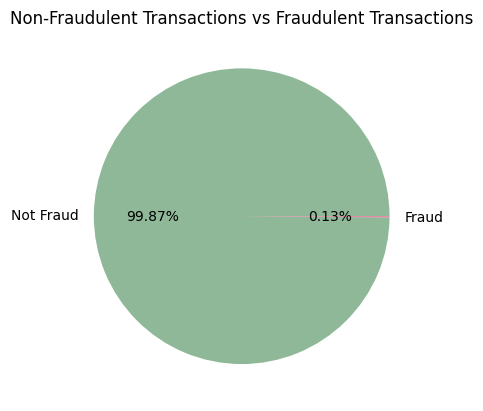

In [12]:
#Visualize amount of fraudulent transactions and non-fradulent transactions as a pie plot
isfraud_pie = [6354407, 8213] #Specific count of non-fraudulent transacations vs fraudulent transactions
labelp = ["Not Fraud", "Fraud"]
explode = [0.5, 0.5]
pf_colors = ["#8EB897", "#DD7596"]

plt.title("Non-Fraudulent Transactions vs Fraudulent Transactions")
plt.rcParams["figure.figsize"] = (10,10)
plt.pie(isfraud_pie, labels=labelp, autopct= "%1.2f%%", colors = pf_colors)
plt.show()

> ### IsFraud Column Initial Analysis
>
* There are 6,354,407 total non-fradulent transactions out of 6,362,620 overall transactions.
* There are 8,213 total fraudlent transactions out of 6,362,620 overall transactions.
* **Only 0.0001291% of all transactions are fradulent.** 
* 99.87% of all transactions are not fraudulent.


___ 
> ### Pre-Existing Information about the "IsFlaggedFraud" column

A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD) expressed as an integer

* 0 = Indicates that the transaction has been not flagged as fraud
* 1 = Indicates that the transaction has been flagged as fraud

In [19]:
#Get count of unique transactions labeled isFlaggedFraud
flagged_count = df["isFlaggedFraud"].value_counts().to_frame()

print ("Count of Unique Transactions Labeled 'IsFlaggedFraud' \n ")
flagged_count

Count of Unique Transactions Labeled 'IsFlaggedFraud' 
 


,count
isFlaggedFraud,
0,6362604
1,16


In [20]:
#Display the proportion of transactions flagged as Not Fraud or Fraud
flagged_prop = df["isFlaggedFraud"].value_counts(normalize=True)

#Convert the flagged_prop series into a dataframe
flagged_prop.to_frame()

,proportion
isFlaggedFraud,
0,0.999997
1,0.000003


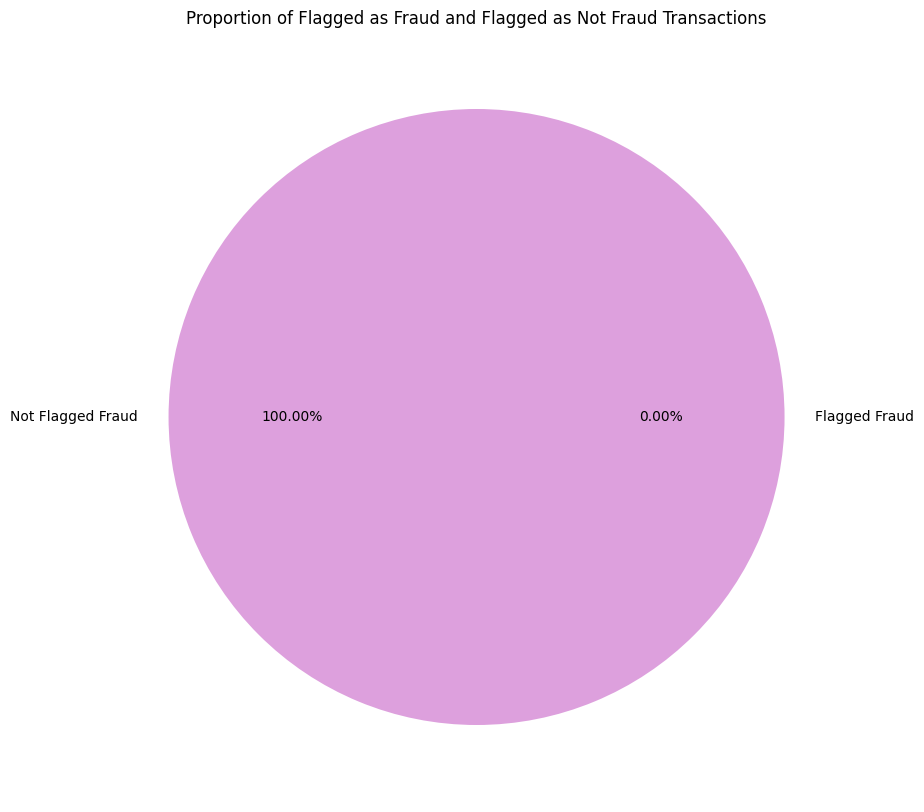

In [21]:
#Visualize amount of flagged fraudulent transactions and transactions flagged as non-fradulent as a pie plot
isflag_pie = [6362604, 16] #Specific count of flagged fraud/flagged not fraud transactions
labelfl = ["Not Flagged Fraud", "Flagged Fraud"]
explode = [0.5, 0.5]
fl_colors = ["#DDA0DD", "#FFFF14"]

plt.title("Proportion of Flagged as Fraud and Flagged as Not Fraud Transactions")
plt.rcParams["figure.figsize"] = (10,10)
plt.pie(isflag_pie, labels=labelfl, autopct= "%1.2f%%", colors = fl_colors)
plt.show()

___
> ### IsFlaggedFraud Column Initial Analysis

* There are 6,362,604 total transactions flagged as not fraudulent out of 6,362,620 overalls transactions.
    * 99.9% of transactions were not classified/flagged as fraud by the naive model
* There are only 16 total fraudulent transactions out of 6,362,620 overall transactions.
* These flagged fraud transactions make up just 0.0003% of the dataset.

> This information may indicate that there is an issue with the pre-existing naive model's classification abilities.

___

> ### Pre-Existing Information about the "type" column
The type of transaction initiated expressed as a string.

* CASH_IN indicates a deposit
* CASH_OUT indicates a withdrawal, leading to a integer less than or equal to 0.00 in the amount column


In [22]:
#Get count of unique transaction types in the dataset
type_amounts = df["type"].value_counts().to_frame()
print("Count of Unique Transaction Types \n", type_amounts)

Count of Unique Transaction Types 
             count
type             
CASH_OUT  2237500
PAYMENT   2151495
CASH_IN   1399284
TRANSFER   532909
DEBIT       41432


/var/folders/6k/9kv93tt9525g263ch7552sy80000gn/T/ipykernel_16856/1762068205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', edgecolor="green", palette= "Set2")


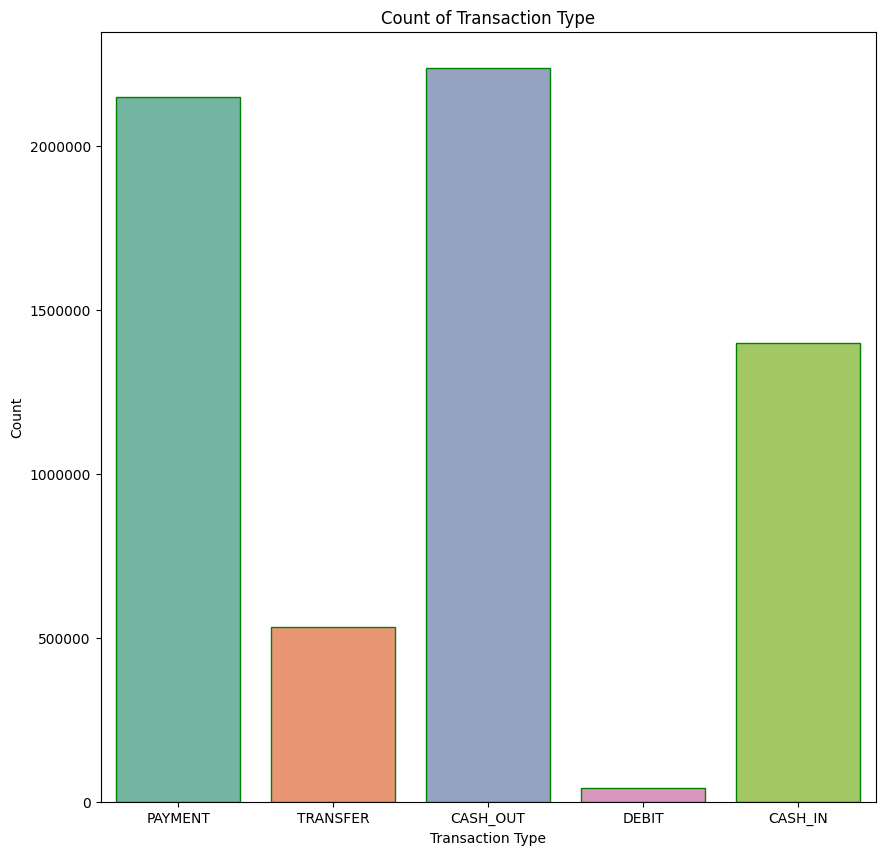

In [23]:
#Create bar graph for univariate analysis of the count of the types of transactions
sns.countplot(data=df, x='type', edgecolor="green", palette= "Set2")
plt.xlabel('Transaction Type')
plt.ylabel('Count')

#Remove scientfic notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.title('Count of Transaction Type')
plt.show()

___
> ### *type* Column Initial Analysis

* The majority of all transactions in this dataset are from payments or cash out (withdrawals).
* Debit transactions only make up a fraction of all activity.
___

> ### Pre-Existing Information about the "nameOrig" column
It is a string that represents the origin account name.

> ### Initial Hypothesis
Accounts with multiple transactions may be the source of the 8,213 instances of fraud.
___

In [46]:
#Examine the nameOrig column to determine amount of accounts that have only initiated 1 transaction
one_time_acc = df["nameOrig"].drop_duplicates()
one_time_acc = one_time_acc.value_counts(ascending=False)
one_time_acc.to_frame()

,count
nameOrig,
C1231006815,1
C1321016348,1
C1041348730,1
C1414646158,1
C1441203994,1
...,...
C1789356502,1
C1771722763,1
C2064983364,1


**There are 6,353,307 accounts that have initiated 1 transaction at this bank.**

In [42]:
#Examine the nameOrig column for unique value count and possible patterns
name_count = df["nameOrig"].value_counts(ascending=False)
all_freq_trans = name_count[name_count > 1].sort_values(ascending=False)
all_freq_trans.to_frame()


,count
nameOrig,
C1902386530,3
C2098525306,3
C363736674,3
C1530544995,3
C1065307291,3
...,...
C1001770944,2
C800314762,2
C365690312,2


**There are 9298 accounts that have conducted either 2 or 3 transactions.**

In [44]:
#Isolate accounts that have initiated more than 2 transactions
name_count = df["nameOrig"].value_counts(ascending=False)
max_transac = name_count[name_count > 2].sort_values(ascending=False)

max_transac.to_frame() 

,count
nameOrig,
C1902386530,3
C363736674,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1999539787,3
C2098525306,3


**Only 15 accounts have initiated 3 transactions.**

In [47]:
#Combine nameOrig count series into dataframe for visualization
acct_frequency = pd.concat([all_freq_trans, one_time_acc], axis=0)
acct_frequency.to_frame()

,count
nameOrig,
C1902386530,3
C2098525306,3
C363736674,3
C1530544995,3
C1065307291,3
...,...
C1789356502,1
C1771722763,1
C2064983364,1


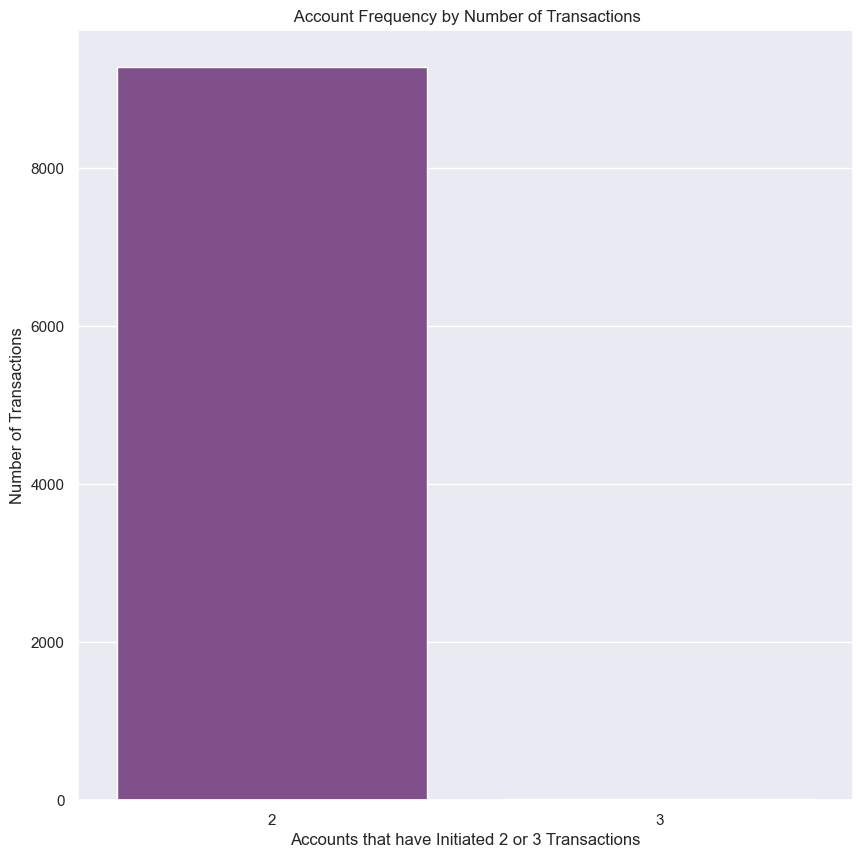

In [48]:
#Create countplot to visualize frequency of accounts that have conducted more than 1 transaction with this bank
plt.figure(figsize=(10, 10))
sns.set(style="darkgrid", palette="PRGn")
sns.countplot(data = df , x= all_freq_trans)
plt.xlabel('Accounts that have Initiated 2 or 3 Transactions')
plt.ylabel('Number of Transactions')
plt.title(' Account Frequency by Number of Transactions')
plt.show()

Text(0.5, 1.0, 'Number Accounts with 1, 2, or 3 Total Transactions')

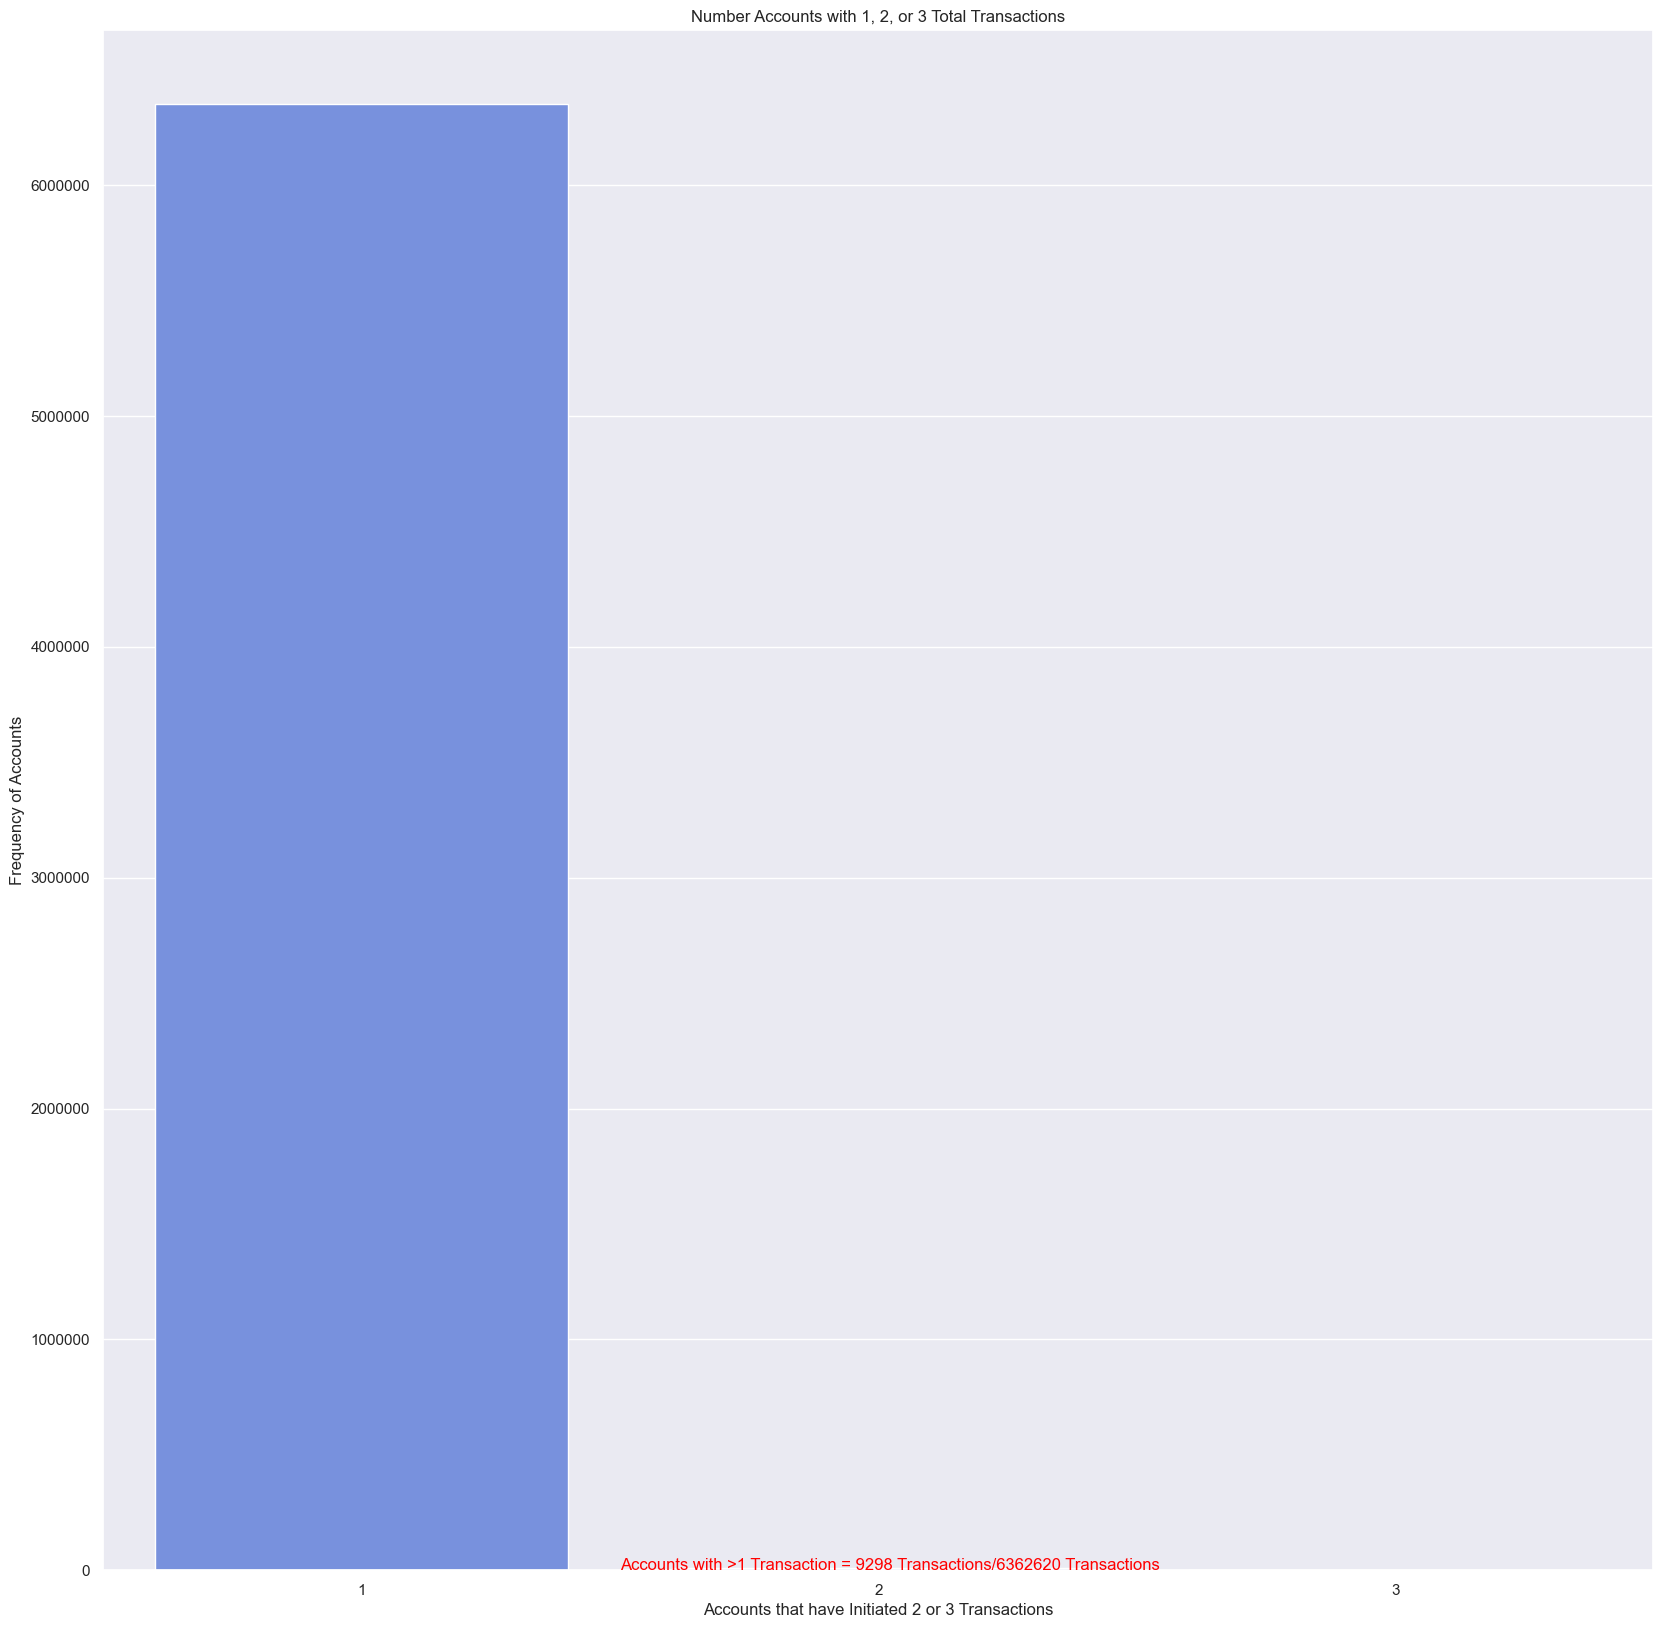

In [56]:
#Create count plot to visualize accounts transaction frequency by number of transactions

#This plot will display accounts with 1, 2, and 3 total transactions in one place
plt.figure(figsize= (20, 20))
sns.set(palette = "coolwarm", style= "darkgrid")
sns.countplot(data = df, x= acct_frequency)

plt.text (x=.5, y=.5, s="Accounts with >1 Transaction = 9298 Transactions/6362620 Transactions", fontsize=12, color = "red")
plt.xlabel('Accounts that have Initiated 2 or 3 Transactions')
plt.ylabel("Frequency of Accounts")

#Remove scientific notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title( 'Number Accounts with 1, 2, or 3 Total Transactions')

> ### *nameOrig* Column Initial Analysis
* 15 accounts have initiated 3 transactions
* 9283 accounts have initiated 2 transactions
* There are 6,353,307 accounts that have initiated 1 transaction at this bank and they compose the overwhelming majority

The 8,213 instances of genuine fraud may have a higher chance of occurring among accounts that have only initiated one transaction.
___